# Declaration of Originality

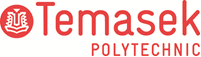

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Zavier Lam (2401673E)
* Tutorial Group                : PC05
* Tutor						    : Kian Eng Ong
* Submission Date               : 11 February


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [55]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# 1. Business Understanding
Smartphone manufacturers and retailers must constantly decide how to price new models based on a long list of technical specfications. Having to manually decide can lead to inconsistent price ranges for different products and revenue loss when devices are mispriced. The business goal of this is to develop a model that is able to accurately predict a smartphone's price range based on its feature to reduce the risk of mispricing smartphones and reducing revenue loss.

# 2. Data Understanding

## 2.1 Load dataset

In [56]:
"""
battery_power - Total energy a battery can store in one time measured in mAh
blue - Has bluetooth or not
clock_speed - speed at which microprocessor executes instructions
dual_sim - Has dual sim support or not
fc - Front Camera mega pixels
four_g - Has 4G or not
int_memory - Internal Memory in Gigabytes
m_dep - Mobile Depth in cm
mobile_wt - Weight of mobile phone
n_cores - Number of cores of processor
pc - Primary Camera mega pixels
px_height - Pixel Resolution Height
px_width - Pixel Resolution Width
ram - Random Access Memory in Megabytes 
sc_h - Screen Height of mobile in cm
sc_w - Screen Width of mobile in cm
talk_time - longest time that a single battery charge will last when you are
three_g - Has 3G or not
touch_screen - Has touch screen or not
wifi - Has wifi or not
price_range - Target variable 0: low cost, 1: medium cost, 2: high cost, 3: very high cost
"""

pd.set_option('display.max_columns', None) # Shows all columns when printing a DataFrame
df = pd.read_csv('train.csv') # Loads train.csv into a pandas DataFrame called df
df # Displays the DataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## 2.2 Summary Statistics

To check what the data type of each column is. Most numeric features are numeric integers, with clock_speed and m_dep being float64. All the categorical features are numeric integers, meaning that no one hot encoding is required later on.

Output:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [57]:
df.dtypes # Displays the data types of each column in the DataFrame

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

To check if the dataset has any missing values. Since there are no missing values, no flling of values with median/mean/mode will be needed.

Output:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [58]:
df.isnull().sum() # Checks for missing values in each column of the DataFrame

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

To remove identical rows to prevent data leakage on the train and test sets. Since there are no duplicate rows in the data, no rows will have to be deleted due to duplicates.

In [59]:
df.duplicated().sum() # Checks for duplicate rows in the DataFrame

np.int64(0)

To display statistical summary and spot problems. The pixel height (px_height) and screen width (sc_w) should not have a minimum value of 0 since its physically impossible to have no pixel height or screen width.

In [60]:
df.describe() # Provides summary statistics for numerical columns in the DataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

To check the count of each target value. Since the 4 bars are about the same height (around 500 each), the target value's distribution is balanced and accuracy score should be used as the evaluation metric later on.

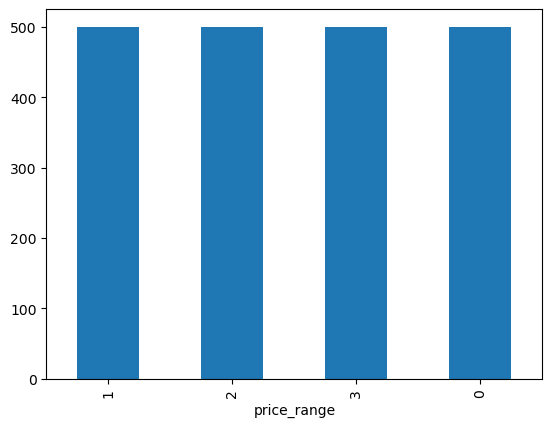

<Axes: xlabel='price_range'>

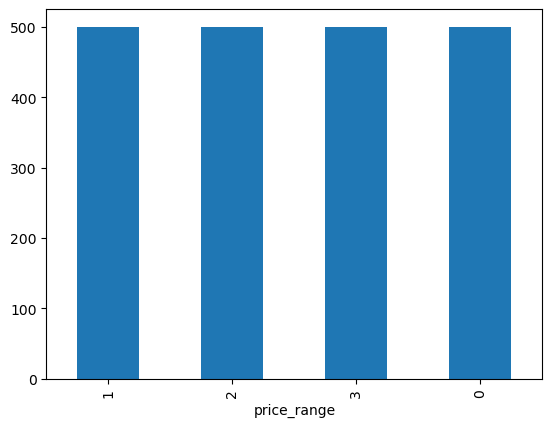

In [61]:
# Understanding distribution of target 0 = low cost, 1 = medium cost, 2 = high cost, 3 = very high cost
df['price_range'].value_counts().plot(kind='bar') # Plots the distribution of the target variable price_range as a bar chart

### 2.3.1.2 Understanding distribution of features

To check the distribution for all the binary features. All binary features are roughly balanced except three_g, which is heavily skewed toward 1 (yes). This shows that most phones support 3G, while other binary features are near 50/50. three_g could also contribute less predictive value because it has limited variation.

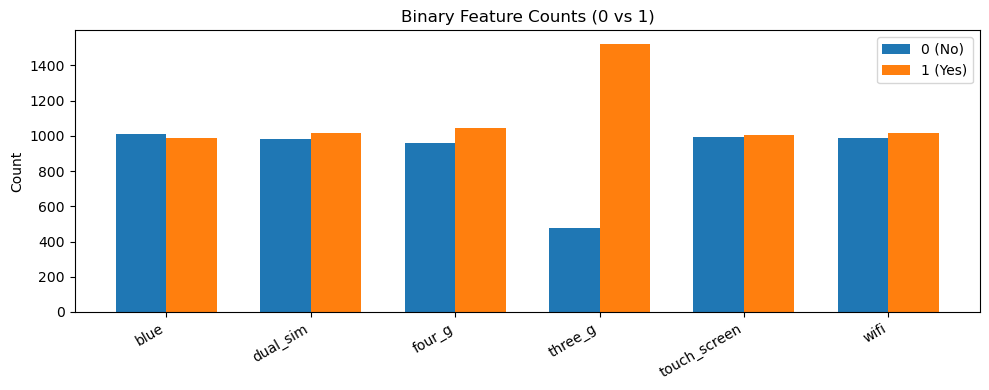

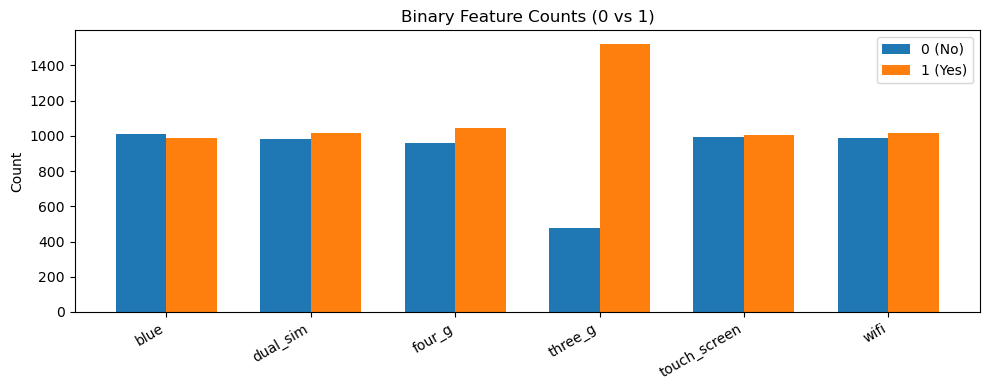

In [62]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] # List of binary feature columns

counts_0 = [ (df[c] == 0).sum() for c in binary_cols ] # Counts of 0s for each binary feature
counts_1 = [ (df[c] == 1).sum() for c in binary_cols ] # Counts of 1s for each binary feature

x = np.arange(len(binary_cols)) # the label locations
width = 0.35 # the width of the bars

plt.figure(figsize=(10,4)) # Set figure size
plt.bar(x - width/2, counts_0, width, label='0 (No)') # Bar for counts of 0s
plt.bar(x + width/2, counts_1, width, label='1 (Yes)') # Bar for counts of 1s

plt.xticks(x, binary_cols, rotation=30, ha='right') # Set x-ticks with rotation
plt.ylabel('Count') # Set y-label
plt.title('Binary Feature Counts (0 vs 1)') # Set title
plt.legend() # Show legend
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

To check the distribution for all numeric features. 

battery_power, px_width, ram, int_memory, mobile_wt, n_cores, pc, sc_h, talk_time are roughly evenly distributed. clock_speed, fc, px_height, sc_w are are right skewed, with fc having heavy concentration near 0-2 with a long tail up to ~19. px_height has many low to medium values with a long tail towards ~2000. sc_w has many small widths, then gradually decreasing counts as width increases.

For the evenly distributed features, these features could provide stronger signal when seperating price tiers, while those that are right skewed could get affected by the more extreme values.

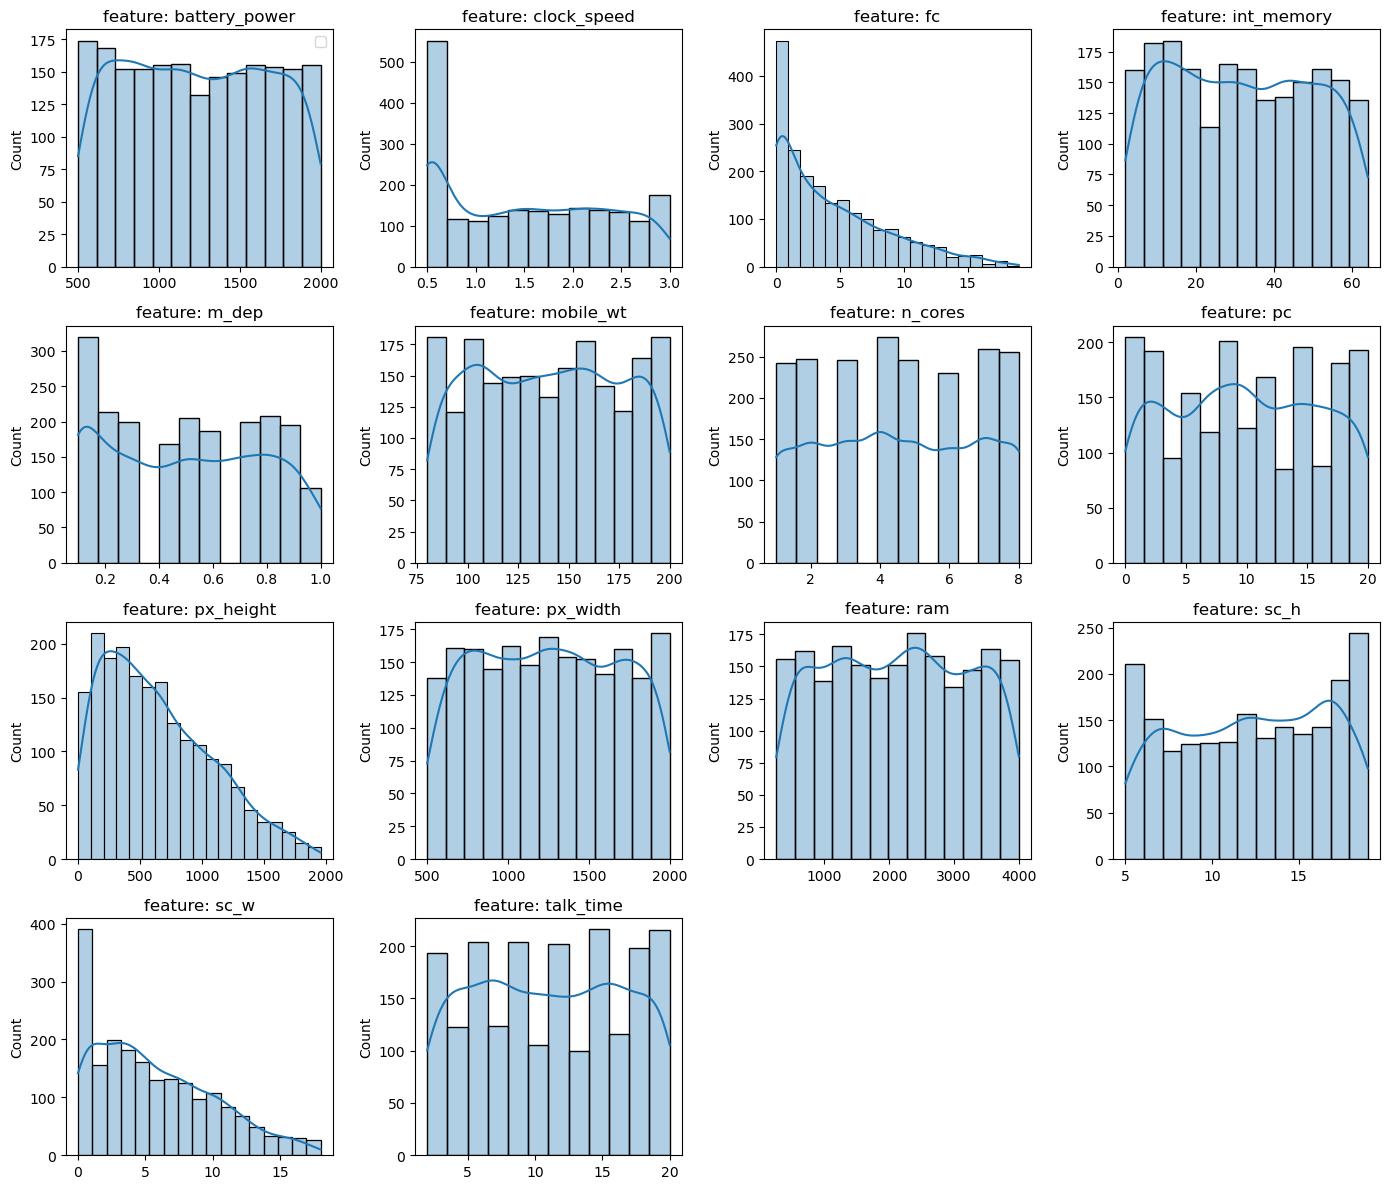

C:\Users\zavie\AppData\Local\Temp\ipykernel_42276\3725881590.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend() # Show legend only for the first subplot


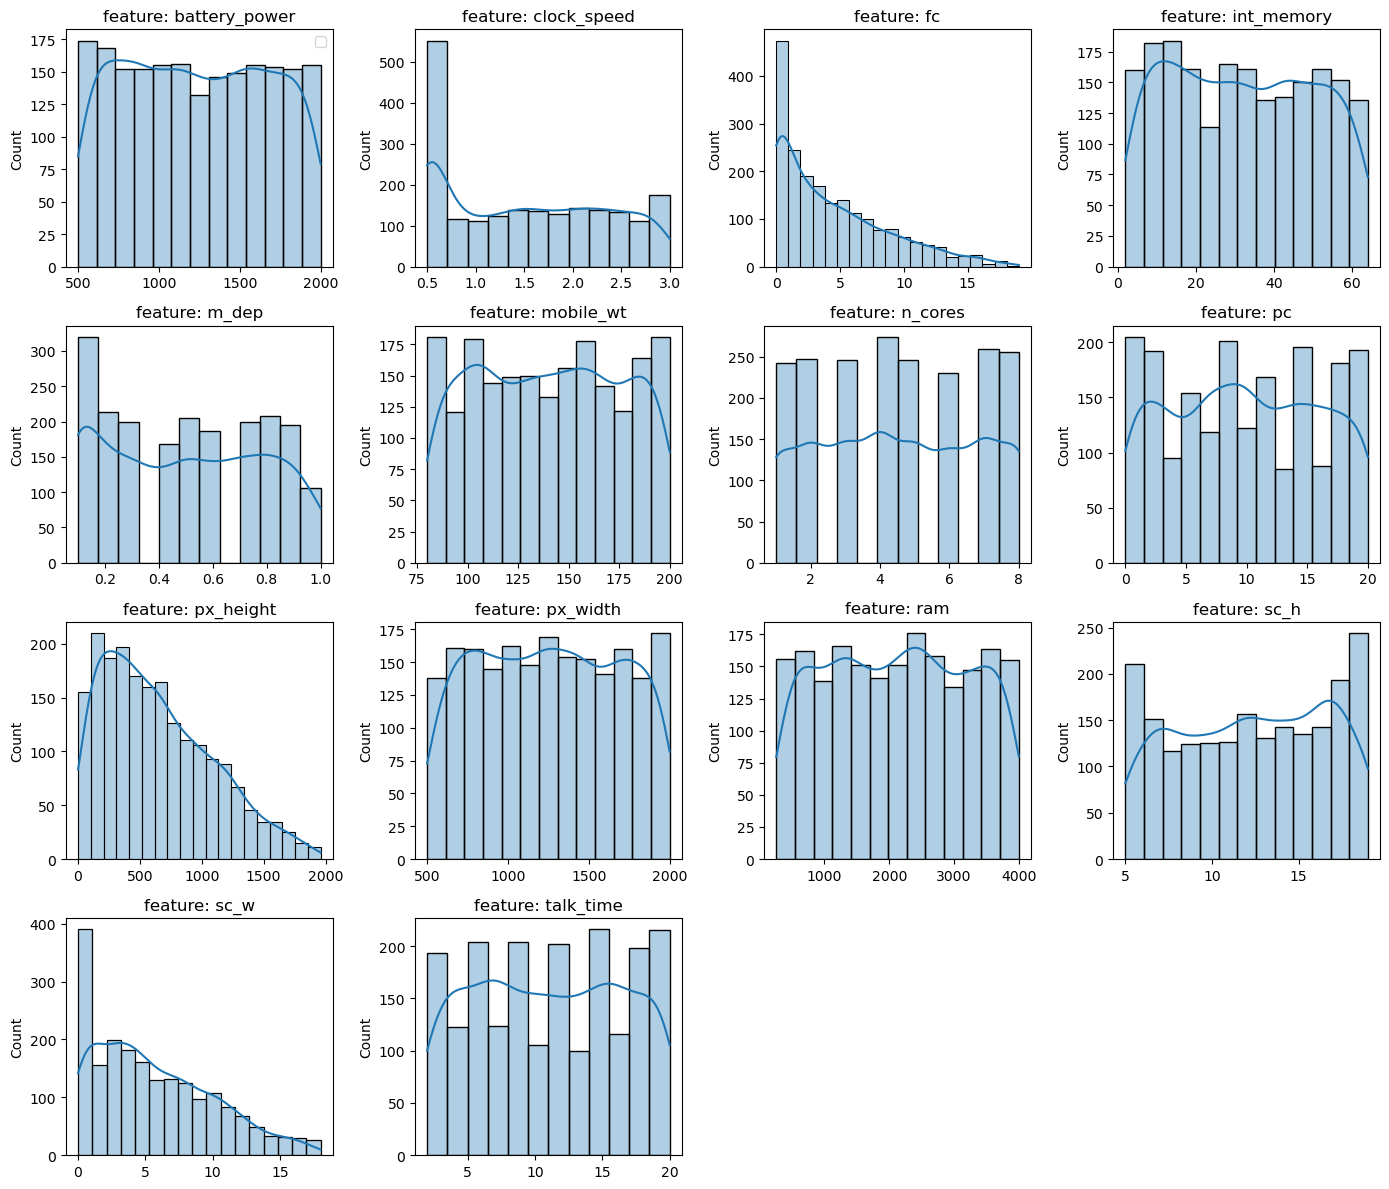

In [63]:
num_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 
                'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 
                'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] # List of numerical feature columns

plt.figure(figsize=(14, 12)) # Set figure size
rows, cols = 4, 4 # Define number of rows and columns for subplots
gs = gridspec.GridSpec(rows, cols) # Create a GridSpec for subplots

for i, column_name in enumerate(num_features): # Loop through numerical features
    ax = plt.subplot(gs[i]) # Create subplot
    sns.histplot(
            df[column_name],
            bins='auto',
            kde=True,
            alpha=0.35,
            label=None,
        )
    ax.set_xlabel('') # Remove x-label for clarity
    ax.set_title(f'feature: {column_name}') # Set title for each subplot
    if i == 0:
        ax.legend() # Show legend only for the first subplot

plt.tight_layout() # Adjust layout
plt.show() # Display the plot

### 2.3.2 Understanding relationship between variables

To check the correlations between features and target.

ram has a very high correlation with price range of 0.92, indicating that ram is strongly associated with the price range of a smartphone. This suggests that ram will dominate prediction compared to other features.

battery power (0.20) has weak correlation, pixel width (0.17) and pixel height (0.15) have very weak correlation with price range meaning that they could contribute a little to the price range.

There are also moderate feature to feature correlations like:

-  sc_w, sc_h (0.51), and px_width, px_height (0.51), which is expected because screen dimensions are related to each other.
- three_g and four_g (0.58) since phones with 4G are expected to also have 3G.
- fc and pc (0.64) has high correlation since camera specifications usually scale together.

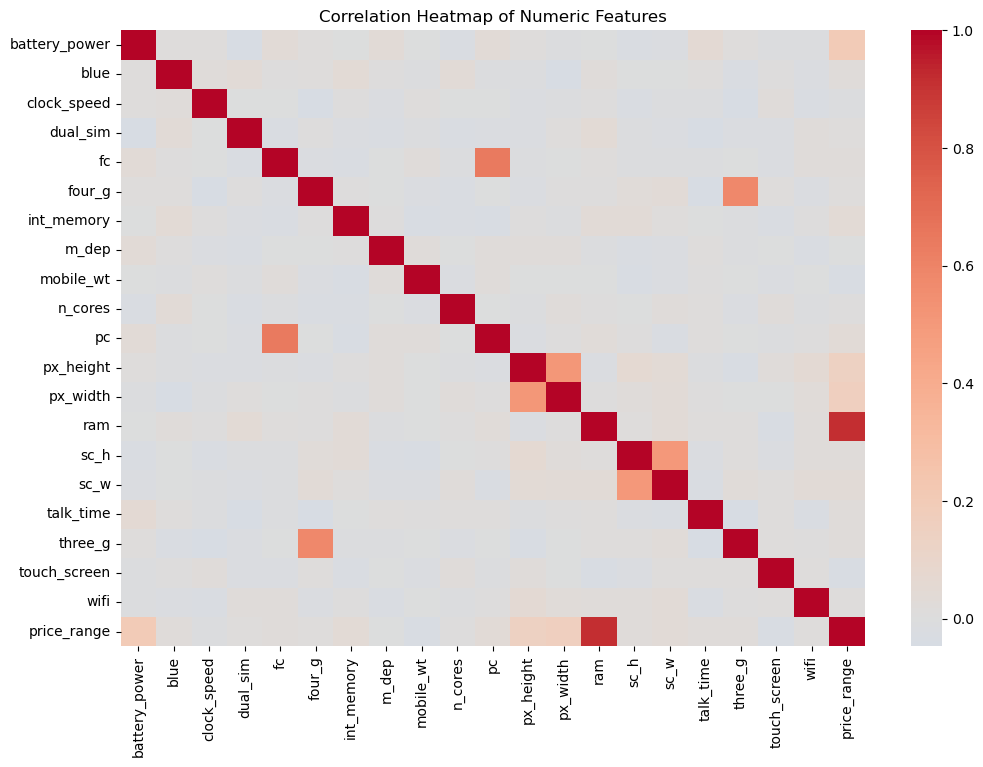

Correlations with price_range
ram vs price_range: 0.92
battery_power vs price_range: 0.20
px_width vs price_range: 0.17
px_height vs price_range: 0.15

Feature to Feature Correlations
sc_w vs sc_h: 0.51
px_width vs px_height: 0.51
three_g vs four_g: 0.58
fc vs pc: 0.64

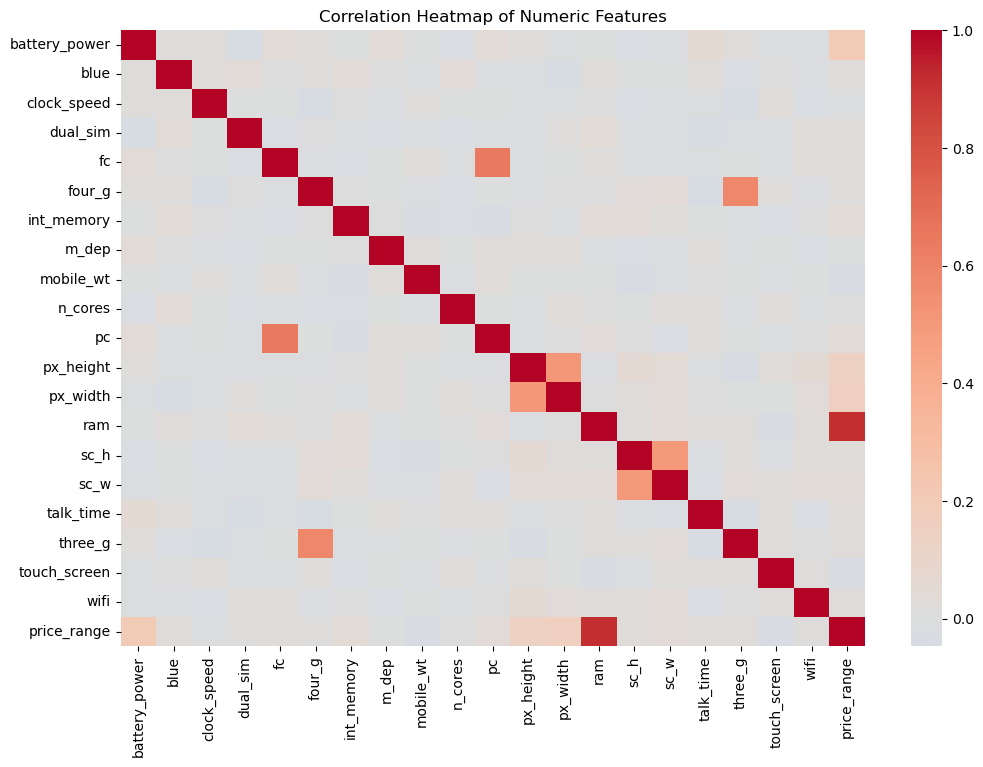

Correlations with price_range
ram vs price_range: 0.92
battery_power vs price_range: 0.20
px_width vs price_range: 0.17
px_height vs price_range: 0.15

Feature to Feature Correlations
sc_w vs sc_h: 0.51
px_width vs px_height: 0.51
three_g vs four_g: 0.58
fc vs pc: 0.64


In [64]:
## Understanding relationship between variables
corr = df.corr(numeric_only=True) # Calculate correlation matrix for numeric features

plt.figure(figsize=(12, 8)) # Set figure size
sns.heatmap(corr, cmap='coolwarm', center=0) # Plot heatmap of correlation matrix
plt.title('Correlation Heatmap of Numeric Features') # Set title
plt.show() # Display the plot

# Display specific correlation values
print("Correlations with price_range")
print(f"ram vs price_range: {corr.loc['ram', 'price_range']:.2f}")
print(f"battery_power vs price_range: {corr.loc['battery_power', 'price_range']:.2f}")
print(f"px_width vs price_range: {corr.loc['px_width', 'price_range']:.2f}")
print(f"px_height vs price_range: {corr.loc['px_height', 'price_range']:.2f}")

print("\nFeature to Feature Correlations")
print(f"sc_w vs sc_h: {corr.loc['sc_w', 'sc_h']:.2f}")
print(f"px_width vs px_height: {corr.loc['px_width', 'px_height']:.2f}")
print(f"three_g vs four_g: {corr.loc['three_g', 'four_g']:.2f}")
print(f"fc vs pc: {corr.loc['fc', 'pc']:.2f}")

To visualize the distribution of the target variable with features that have some correlation.

ram has a strong positive trend from low to very high price range, with the median ram for low cost smartphones being 720MB, to 3510MB median ram for very high cost smartphones. This indicates that ram is a strong discriminator and explains why it is highly correlated with price_range.

Other features like battery power, pixel width and pixel height have weaker but noticable positive trends. This indicates that battery power and resolution are associated with higher price tiers, but the relationship is weaker compared to ram.

Overall, the plots indicate that price_range is mostly influenced by a small set of hardware specifications, which could mean that simpler models could perform strongly.

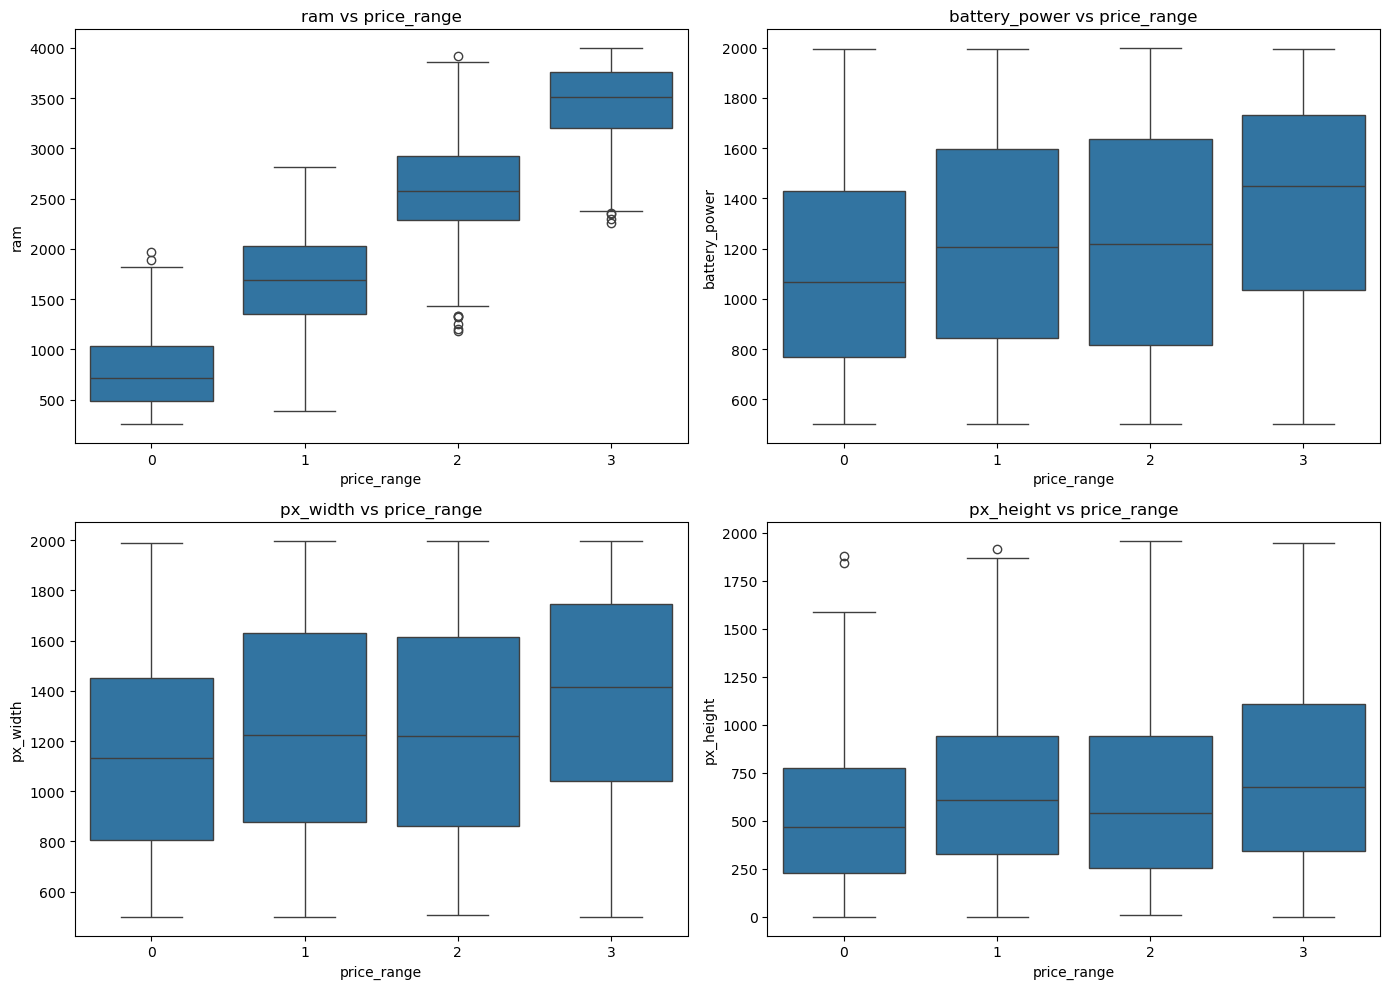

=== RAM Median Values by Price Range ===

Price range 0 (low-cost): 720 MB
Price range 1 (medium-cost): 1686 MB
Price range 2 (high-cost): 2577 MB
Price range 3 (very high-cost): 3510 MB

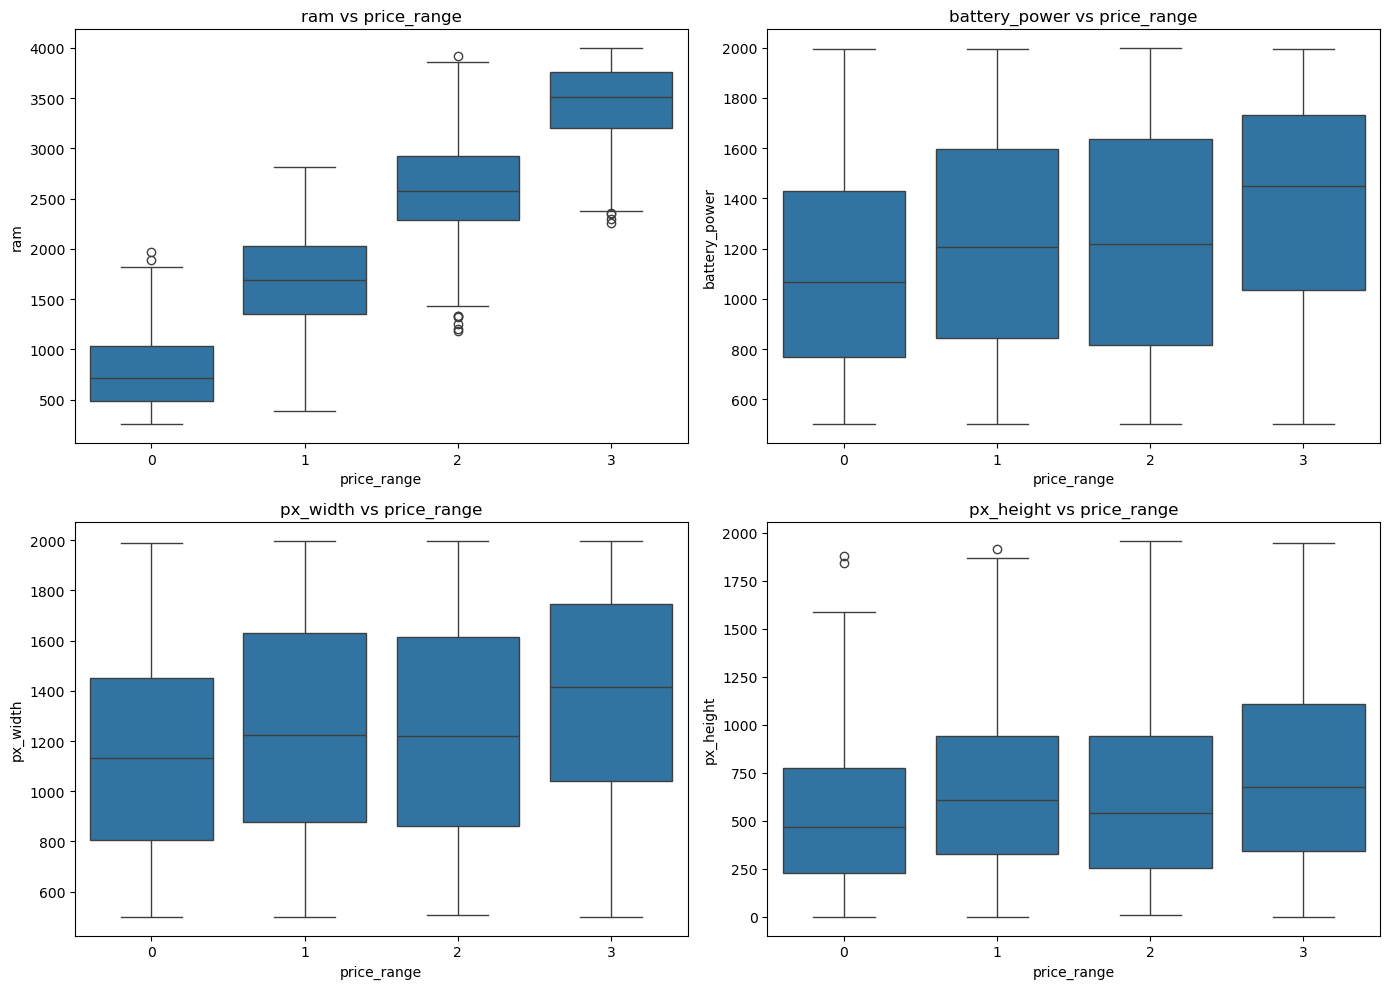

=== RAM Median Values by Price Range ===

Price range 0 (low-cost): 720 MB
Price range 1 (medium-cost): 1686 MB
Price range 2 (high-cost): 2577 MB
Price range 3 (very high-cost): 3510 MB


In [65]:
plt.figure(figsize=(14, 10)) # Set figure size
features_to_plot = ['ram', 'battery_power', 'px_width', 'px_height'] # Features to plot against price_range

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i) # Create subplot
    sns.boxplot(data=df, x='price_range', y=feature) # Boxplot of feature vs price_range
    plt.title(f'{feature} vs price_range') # Set title

plt.tight_layout() # Adjust layout
plt.show() # Display the plot

print("=== RAM Median Values by Price Range ===\n")

print(f"Price range 0 (low-cost): {df[df['price_range'] == 0]['ram'].median():.0f} MB")
print(f"Price range 1 (medium-cost): {df[df['price_range'] == 1]['ram'].median():.0f} MB")
print(f"Price range 2 (high-cost): {df[df['price_range'] == 2]['ram'].median():.0f} MB")
print(f"Price range 3 (very high-cost): {df[df['price_range'] == 3]['ram'].median():.0f} MB")

To visualize the relationships between features that showed moderate to high correlations in the heatmap.

- For 3G vs 4G, it shows that not all phones with 3G also have 4G.
- For primary camera vs front camera, it shows a positive linear relationship, showing that camera specifications scale together in smartphone models.
- For pixel width vs pixel height, it also shows a positive linear relationship, with more smartphones having smaller screen resolutions.

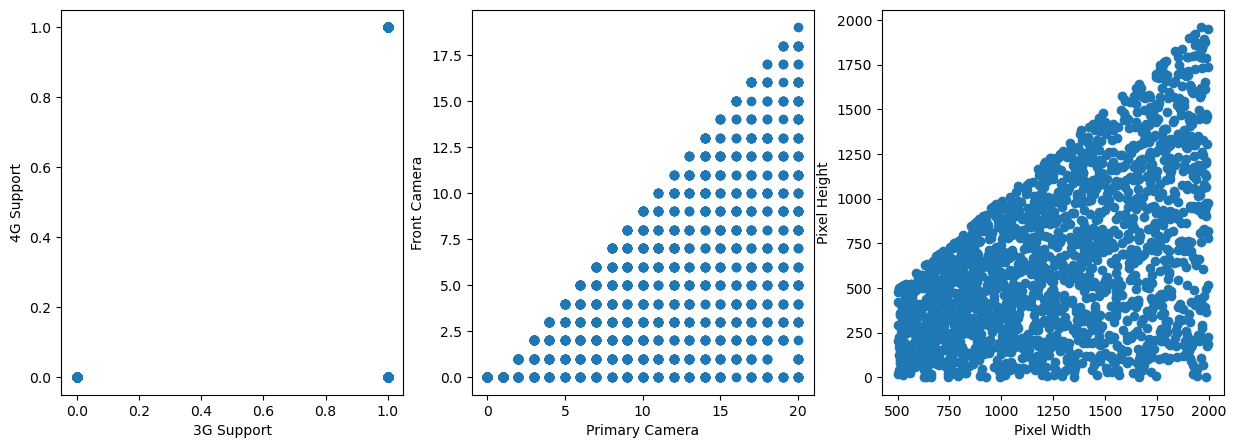

Text(0, 0.5, 'Pixel Height')

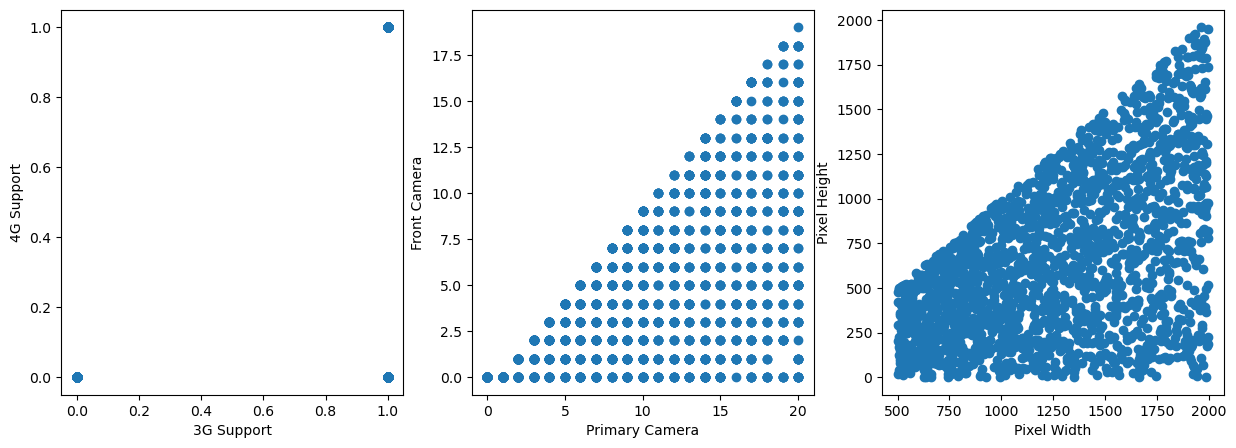

In [66]:
plt.figure(figsize=(15, 5)) # Set figure size

plt.subplot(1, 3, 1)
plt.scatter(df['three_g'], df['four_g'])
plt.xlabel('3G Support')
plt.ylabel('4G Support')

plt.subplot(1, 3, 2)
plt.scatter(df['pc'], df['fc'])
plt.xlabel('Primary Camera')
plt.ylabel('Front Camera')

plt.subplot(1, 3, 3)
plt.scatter(df['px_width'], df['px_height'])
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')

# 3. Data Preparation

## 3.1 Data Cleaning

Since pixel height (px_height) and screen width (sc_w) cannot physically be 0, the values are are errors and are replaced with the median of those features, because median is less affected to skew and outliers. This change improves data quality by preventing values that will never be inputed from distorting feature distributions.

The assumption is that even though some values sound physically impossible like 1 pixel height, since its mathematically possible for such values to exist in the column, they are not cleaned.

In [67]:
df_clean = df.copy() # Create a copy of the original DataFrame for cleaning

px_height_median = int(round(df.loc[df['px_height'] != 0, 'px_height'].median())) # Calculate median of px_height excluding zeros
df_clean.loc[df_clean['px_height'] == 0, 'px_height'] = px_height_median # Replace 0s in px_height with median

sc_w_median = int(round(df.loc[df['sc_w'] != 0, 'sc_w'].median())) # Calculate median of sc_w excluding zeros
df_clean.loc[df_clean['sc_w'] == 0, 'sc_w'] = sc_w_median # Replace 0s in sc_w with median

df_clean.describe() # Display summary statistics of the cleaned DataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.674000,1251.515500,2124.213000,12.306500,6.307000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.318143,432.199447,1084.732044,4.213245,3.961893,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,566.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 3.2 Train-Test Split

To train the model with training data to prevent data leakage and test the model using unseen test data to measure real performance.

In [68]:
## Split data into train set and test set
X = df_clean.drop('price_range', axis=1) # Features
y = df_clean['price_range'] # Target variable

test_size = 0.3 # Proportion of the dataset to include in the test split
random_state = 2025 # Seed for random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) # Split the data

# 4. Modelling

### 4.2 Train Model

To initialize the model.

In [69]:
logr = LogisticRegression(max_iter=13614) # Create Logistic Regression model with increased max_iter

# 5. Model Evaluation

To train and evaluate the model.

Output:
|                 | Accuracy score   |
|-----------------|:----------------:|
| Train accuracy: | 0.79 (to 2 d.p.) |
| Test accuracy:  | 0.75 (to 2 d.p.) |

The base model achieved an accuracy of 0.75. A 0.04 difference between the train and test accuracy indicates that its a good fit due to the small difference.

In [70]:
logr.fit(X_train, y_train) # Fit the model on the training data

y_train_pred = logr.predict(X_train) # Predict on the training set
train_acc = accuracy_score(y_train, y_train_pred) # Calculate training accuracy

y_test_pred = logr.predict(X_test) # Predict on the test set
test_acc = accuracy_score(y_test, y_test_pred) # Calculate test accuracy

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Train accuracy: 0.7892857142857143
Test accuracy: 0.7533333333333333


c:\Users\zavie\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13613 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score is used as the evaluation metric since it all the target classes are balanced. Furthermore, it gives a clear single number of how often the model is correct, since a higher accuracy score will help reduce mispricing and revenue loss. This makes it the easiest metric for investors to understand and use to judge if a model is reliable enough to support pricing decisions. Investors can also use it for business like metrics that can be turned into simple KPI targets whereas with other metrics they are class-specific and less convenient to pitch as a single performance indicator.

                  precision    recall  f1-score   support

               0       0.90      0.84      0.87       158
               1       0.67      0.71      0.69       138
               2       0.65      0.59      0.62       148
               3       0.78      0.85      0.82       156

    accuracy                               0.75       600
    macro avg          0.75      0.75      0.75       600
    weighted avg       0.75      0.75      0.75       600

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       158
           1       0.67      0.71      0.69       138
           2       0.65      0.59      0.62       148
           3       0.78      0.85      0.82       156

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



Output: Predicted price range for unseen data: [2 1 2 1 2]

In [72]:
## New data (to show theres a difference)
X_unseen = [[1100,1,1.9,0,7,1,35,0.7,165,5,9,1050,1500,2700,13,6,15,1,1,1], 
            [950,0,2.2,1,4,0,25,0.8,148,4,10,900,1300,2100,11,5,12,0,1,1], 
            [1550,1,1.3,0,8,1,48,0.6,175,6,14,1200,1700,3000,16,9,18,1,0,1], 
            [850,0,0.6,1,2,0,20,0.9,135,3,6,750,1100,1400,9,3,7,1,1,0], 
            [1200,1,2.5,0,10,1,40,0.5,180,7,16,1300,1800,3200,17,10,20,1,1,1]]

X_unseen = pd.DataFrame(X_unseen, columns=X.columns)
## Predict
y_unseen_pred = logr.predict(X_unseen)
print("Predicted price range for unseen data:", y_unseen_pred)


Predicted price range for unseen data: [2 1 2 1 2]


## First Iterative model development (feature engineering)

Screen area is found by multiplying the screen height and screen width. Screen area is important because larger screens usually have better usability which can affect pricing more than using screen height and screen width seperately.

Pixel density is found by dividing the sceen's diagonal resolution (from pixel width and pixel height) by the screen’s diagonal physical size in inches (from sc_h and sc_w, converted from cm to inches). Pixel density is important because it measures how sharp a screen resolution is, which can affect the price range.

Battery per weight is found by dividing battery power by mobile weight. This feature is important because it finds how much battery capacity a phone provides for its weight. Smartphones in the very high price range often balance strong battery life without being excessively heavy.

In [74]:
df_feature_engineering = df_clean.copy() # Create a copy of the cleaned DataFrame for feature engineering

# Screen area (physical size in cm²)
df_feature_engineering['screen_area'] = df_clean['sc_h'] * df_clean['sc_w']

# Pixel density (PPI - pixels per inch)
diagonal_pixels = np.sqrt(df_clean['px_width']**2 + df_clean['px_height']**2)
screen_diagonal_inches = np.sqrt(df_clean['sc_h']**2 + df_clean['sc_w']**2) / 2.54

df_feature_engineering['ppi'] = diagonal_pixels / screen_diagonal_inches

# Battery efficiency features
df_feature_engineering['battery_per_weight'] = df_clean['battery_power'] / df_clean['mobile_wt']

# Reorder columns: new features after 'wifi', price_range last
original_cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 
                 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 
                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
new_cols = ['screen_area', 'ppi', 'battery_per_weight']
target_col = ['price_range']

df_feature_engineering = df_feature_engineering[original_cols + new_cols + target_col] # Reorder columns to place new features after 'wifi' and 'price_range' last

print("New features created:")
df_feature_engineering

New features created:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,screen_area,ppi,battery_per_weight,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,63,168.475113,4.478723,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,51,321.394163,7.507353,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,22,484.058963,3.882759,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,128,306.792809,4.694656,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,16,527.084472,12.914894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,52,420.294822,7.490566,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,110,370.352162,10.508021,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,9,518.489087,17.694444,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,180,92.457066,10.427586,0


One of the new features battery_per_weight shows a noticable small positive correlation with price range, suggesting that higher-tier phones tend to offer better battery capacity relative to weight.

screen_area has a strong positive correlation with sc_w and sc_h because it is directly computed from them. ppi is strongly related to px_width, px_height, and inversely related to screen dimensions (sc_h, sc_w) because pixel density increases when resolution is high and physical screen size is smaller. battery_per_weight correlates positively with battery_power and negatively with mobile_wt. Since the new features are derived from existing features, they create redundancy. This could make coefficients harder to interpret, so feature selection will be done later on.

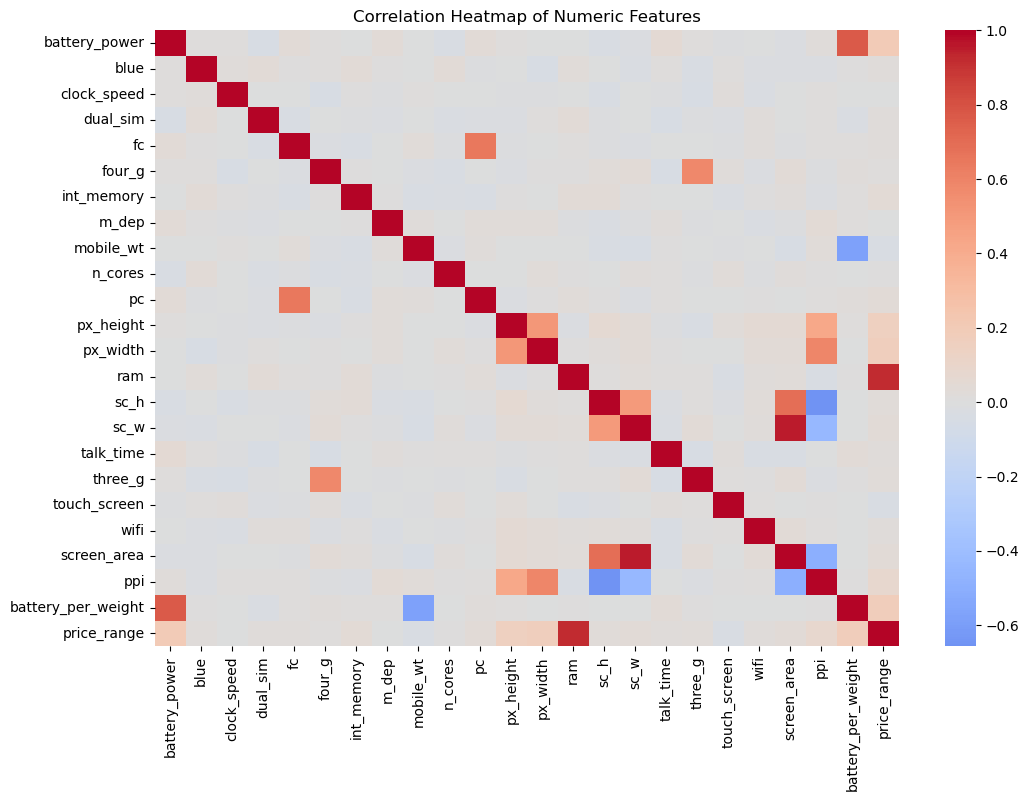

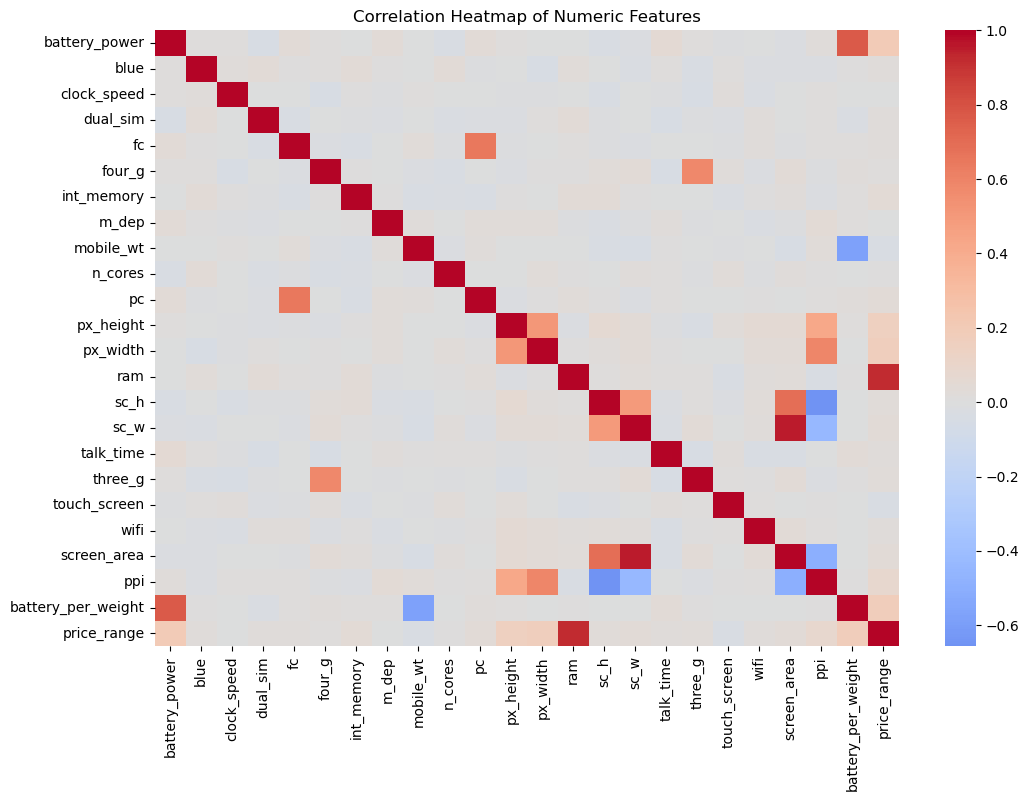

In [75]:
corr = df_feature_engineering.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Output:
|                | Before feature engineering | After feature engineering |
|----------------|:--------------------------:|:-------------------------:|
| Train accuracy | 0.79 (to 2 d.p.)           | 0.89 (to 2 d.p.)          |
| Test accuracy   |0.75 (to 2 d.p.)           | 0.86 (to 2 d.p.)          |

The engineered features gave roughly + 0.10 to the accuracy score of the model. This shows that the new features gave the model more useful data to predict more accurately.

In [76]:
X_feature_engineering = df_feature_engineering.drop('price_range', axis=1) # Features including new engineered features
y_feature_engineering = df_feature_engineering['price_range'] # Target variable

test_size = 0.3 # Proportion of the dataset to include in the test split
random_state = 2025 # Seed for random number generator for reproducibility
X_train_feature_engineering, X_test_feature_engineering, y_train_feature_engineering, y_test_feature_engineering = train_test_split(X_feature_engineering, y_feature_engineering, test_size=test_size, random_state=random_state) # Split the data

logr_feature_engineering = LogisticRegression(max_iter=13614) # Create Logistic Regression model with increased max_iter

logr_feature_engineering.fit(X_train_feature_engineering, y_train_feature_engineering) # Fit model on training data

y_train_pred_feature_engineering = logr_feature_engineering.predict(X_train_feature_engineering) # Predict on the training set
train_acc_feature_engineering = accuracy_score(y_train_feature_engineering, y_train_pred_feature_engineering) # Calculate training accuracy

y_test_pred_feature_engineering = logr_feature_engineering.predict(X_test_feature_engineering) # Predict on the test set
test_acc_feature_engineering = accuracy_score(y_test_feature_engineering, y_test_pred_feature_engineering) # Calculate test accuracy

print("Train accuracy (feature engineering):", train_acc_feature_engineering)
print("Test accuracy (feature engineering):", test_acc_feature_engineering)

Train accuracy (feature engineering): 0.8885714285714286
Test accuracy (feature engineering): 0.86


c:\Users\zavie\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13578 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Output: Predicted price range for unseen data (feature engineering): [2 1 2 1 2]

In [77]:
## New data (to show theres a difference)
X_unseen = [[1100,1,1.9,0,7,1,35,0.7,165,5,9,1050,1500,2700,13,6,15,1,1,1,78,495.24,6.67], 
            [950,0,2.2,1,4,0,25,0.8,148,4,10,900,1300,2100,11,5,12,0,1,1,55,275.86,6.42], 
            [1550,1,1.3,0,8,1,48,0.6,175,6,14,1200,1700,3000,16,9,18,1,0,1,144,531.25,8.86], 
            [850,0,0.6,1,2,0,20,0.9,135,3,6,750,1100,1400,9,3,7,1,1,0,27,192.31,6.30], 
            [1200,1,2.5,0,10,1,40,0.5,180,7,16,1300,1800,3200,17,10,20,1,1,1,170,600.00,6.67]]

X_unseen = pd.DataFrame(X_unseen, columns=X_feature_engineering.columns)
## Predict
y_unseen_pred = logr_feature_engineering.predict(X_unseen)
print("Predicted price range for unseen data (feature engineering):", y_unseen_pred)

Predicted price range for unseen data (feature engineering): [2 1 2 1 2]


## Second iteration model development (feature engineering + feature selection)

From the feature importance plot, ram is by far the highest feature importance, meaning that the model relies most on RAM to distinguish smartphone price ranges. This matches real pricing as higher priced phones usually have more RAM.

Other features like battery and display related features contribute much less compared to RAM. The new engineered features seem to be among the more important features, suggesting that display quality/size and battery-related value help refine the price-range decision.

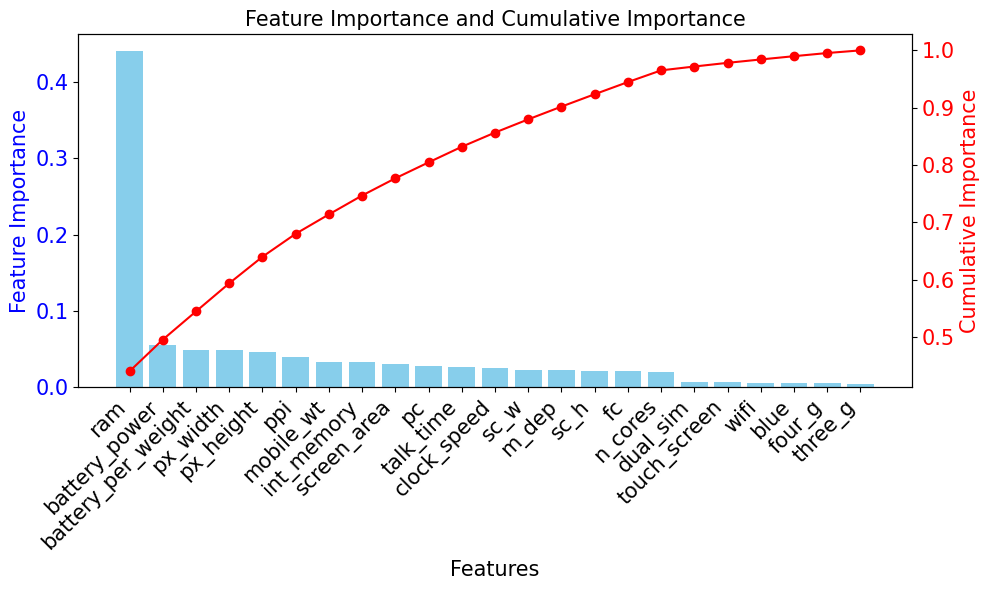

C:\Users\zavie\AppData\Local\Temp\ipykernel_42276\833663667.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_rf_feat_impt['Feature'], rotation=45, ha='right', size=15) # Rotate x-labels


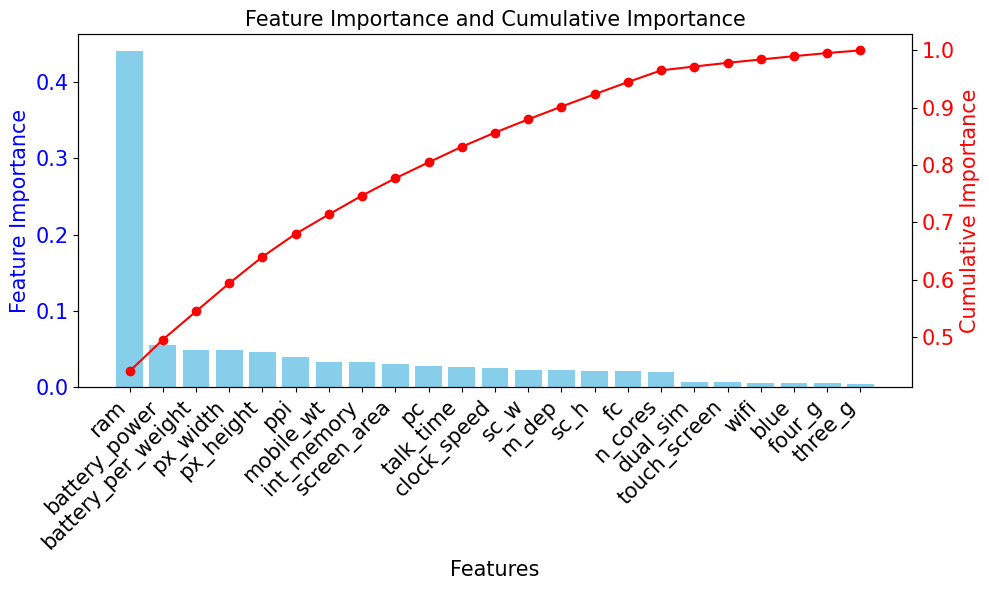

,Feature,Importance,Cumulative Importance
0,ram,0.440603,0.440603
1,battery_power,0.055127,0.495730
2,battery_per_weight,0.049218,0.544948
3,px_width,0.048995,0.593943
4,px_height,0.046235,0.640178
5,ppi,0.040082,0.680260
6,mobile_wt,0.033781,0.714041
7,int_memory,0.032956,0.746997
8,screen_area,0.029997,0.776993
9,pc,0.027762,0.804755


In [78]:
X_feature_engineering = df_feature_engineering.drop('price_range', axis=1) # Features
y_feature_engineering = df_feature_engineering['price_range'] # Target variable

test_size = 0.3 # Proportion of the dataset to include in the test split
random_state = 2025 # Seed for random number generator for reproducibility
X_train_feature_engineering, X_test_feature_engineering, y_train_feature_engineering, y_test_feature_engineering = train_test_split(X_feature_engineering, y_feature_engineering, test_size=test_size, random_state=random_state) # Split the data

rf = RandomForestClassifier() # Create Random Forest Classifier
rf.fit(X_train_feature_engineering, y_train_feature_engineering) # Fit model on training data

# Create feature importance dataframe
df_rf_feat_impt = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': rf.feature_importances_
})

# Sort by importance (descending)
df_rf_feat_impt = df_rf_feat_impt.sort_values('Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative importance
df_rf_feat_impt['Cumulative Importance'] = df_rf_feat_impt['Importance'].cumsum()

## Plot feature importance and cumulative importance
fig, ax1 = plt.subplots(figsize=(10, 6)) # Create figure with primary axis

# Bar chart for feature importance
ax1.bar(df_rf_feat_impt['Feature'], df_rf_feat_impt['Importance'], color='skyblue') # Bar plot of feature importance
ax1.set_xlabel('Features', size=15) # Set x-label
ax1.set_ylabel('Feature Importance', color='blue', size=15) # Set y-label for primary axis
ax1.tick_params(axis='y', labelcolor='blue', labelsize=15) # Set y-axis tick color
ax1.set_xticklabels(df_rf_feat_impt['Feature'], rotation=45, ha='right', size=15) # Rotate x-labels

# Line chart for cumulative importance
ax2 = ax1.twinx() # Create secondary y-axis
ax2.plot(df_rf_feat_impt['Feature'], df_rf_feat_impt['Cumulative Importance'], color='red', marker='o') # Plot cumulative importance
ax2.set_ylabel('Cumulative Importance', color='red', size=15) # Set y-label for secondary axis
ax2.tick_params(axis='y', labelcolor='red', labelsize=15) # Set y-axis tick color

plt.title('Feature Importance and Cumulative Importance', size=15) # Set title
plt.tight_layout() # Adjust layout to prevent label cutoff
plt.show() # Display the plot

df_rf_feat_impt # Display the feature importance dataframe

The plot shows that the performance improves sharply with the first few features and peaks at 5 to 6 features. After 6 features, the performance drops and doesn't increase anymore, indicating that those extra features are more redundant than useful.

Since the cv score when including and excluding the pixel per density is the same, between using 5 or 6 features, I chose to use 5. This is because it is easier for businesses to use the model since the 6th feature (pixel per density) requires alot of calculation which makes using the model more complicated.

Output:
|                          | Accuracy score   |
|--------------------------|:----------------:|
| Without ppi (5 features) | 0.97 (to 2 d.p.) |
| With ppi (6 features)    | 0.97 (to 2 d.p.) |

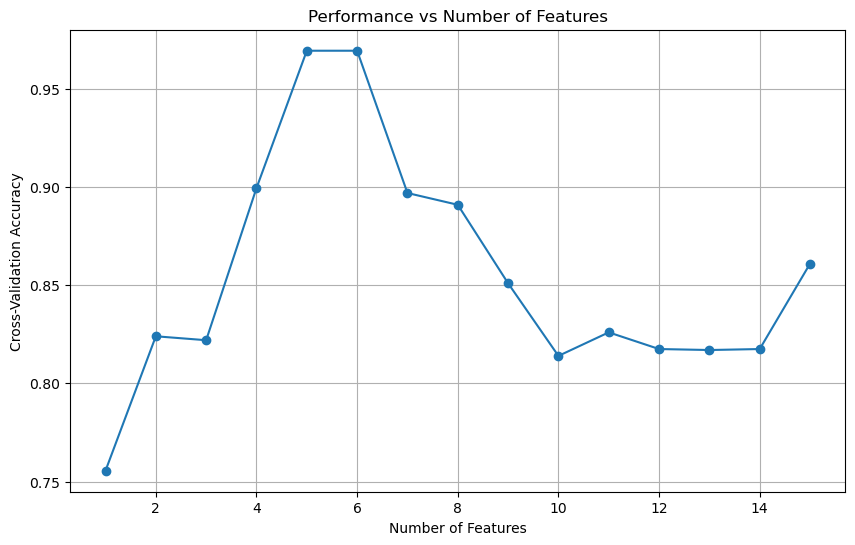

c:\Users\zavie\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13614 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=13614).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zavie\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13614 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=13614).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

    n_features            features  cv_score       std
0            1                 ram    0.7555  0.013454
1            2       battery_power    0.8240  0.005385
2            3  battery_per_weight    0.8220  0.004301
3            4            px_width    0.8995  0.009274
4            5           px_height    0.9695  0.007810
5            6                 ppi    0.9695  0.007969
6            7           mobile_wt    0.8970  0.067294
7            8          int_memory    0.8910  0.040546
8            9         screen_area    0.8510  0.020773
9           10                  pc    0.8140  0.014018
10          11           talk_time    0.8260  0.018344
11          12         clock_speed    0.8175  0.013964
12          13                sc_w    0.8170  0.017277
13          14               m_dep    0.8175  0.016658
14          15                sc_h    0.8610  0.009823


c:\Users\zavie\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13584 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


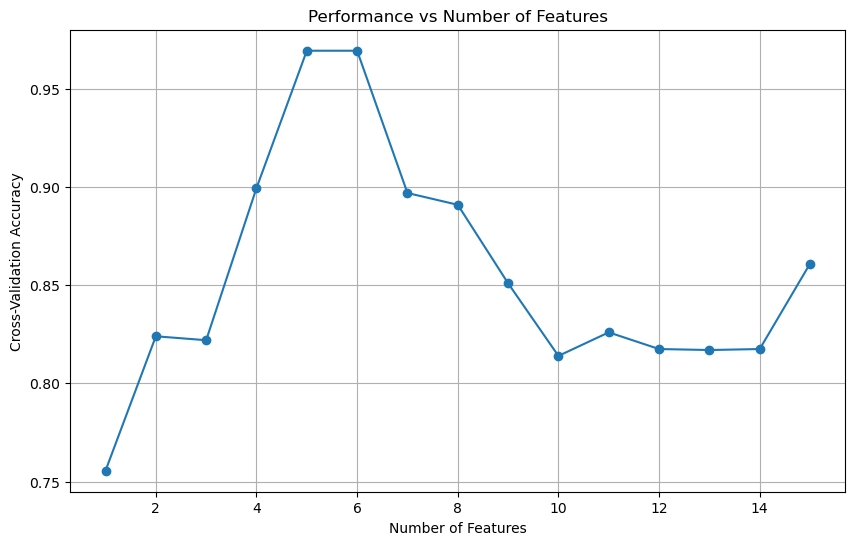

In [79]:
incremental_results = [] # Initialize list to store results

# Test with top 1, top 2, top 3... top 15 features
for n_features in range(1, 16):
    top_n_features = df_rf_feat_impt.head(n_features)['Feature'].tolist()
    X_test = df_feature_engineering[top_n_features]
    
    cv_scores = cross_val_score(LogisticRegression(max_iter=13614, random_state=2025), 
                                X_test, y, cv=5, scoring='accuracy') # 5-fold CV
    
    incremental_results.append({
        'n_features': n_features, # number of features used
        'features': top_n_features[-1],  # last feature added
        'cv_score': cv_scores.mean(), # average CV score
        'std': cv_scores.std() # standard deviation of CV scores
    })

df_incremental = pd.DataFrame(incremental_results) # Create DataFrame from results
print(df_incremental)

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_incremental['n_features'], df_incremental['cv_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Performance vs Number of Features')
plt.grid()
plt.show()

In [80]:
features_to_keep = ['ram', 'battery_per_weight', 'px_width', 'px_height', 
                   'battery_power'] # Selected top features based on analysis

df_feature_selection = df_feature_engineering[features_to_keep + ['price_range']] # Create new DataFrame with selected features

Output:
|                | Before feature selection | After feature selection |
|----------------|:------------------------:|:-----------------------:|
| Train accuracy | 0.89 (to 2 d.p.)         | 0.98 (to 2 d.p.)        |
| Test accuracy  |0.86 (to 2 d.p.)          | 0.97 (to 2 d.p.)        |

Feature selection gave roughly another + 0.10 to the accuracy score of the model. This shows that removing the redundant features helped the model focus on the specifications most strongly linked to smartphone price range, allowing it to have higher accuracy compared to before.

In [81]:
X_feature_selection = df_feature_selection.drop('price_range', axis=1) # Features
y_feature_selection = df_feature_selection['price_range'] # Target variable

test_size = 0.3 # Proportion of the dataset to include in the test split
random_state = 2025 # Seed for random number generator for reproducibility
X_train_feature_selection, X_test_feature_selection, y_train_feature_selection, y_test_feature_selection = train_test_split(X_feature_selection, y_feature_selection, test_size=test_size, random_state=random_state) # Split the data

logr_feature_selection = LogisticRegression(max_iter=13614) # Create Logistic Regression model with increased max_iter

logr_feature_selection.fit(X_train_feature_selection, y_train_feature_selection) # Fit model on training data

y_train_pred_feature_selection = logr_feature_selection.predict(X_train_feature_selection) # Predict on the training set
train_acc_feature_selection = accuracy_score(y_train_feature_selection, y_train_pred_feature_selection) # Calculate training accuracy

y_test_pred_feature_selection = logr_feature_selection.predict(X_test_feature_selection) # Predict on the test set
test_acc_feature_selection = accuracy_score(y_test_feature_selection, y_test_pred_feature_selection) # Calculate test accuracy

print("Train accuracy (feature selection):", train_acc_feature_selection)
print("Test accuracy (feature selection):", test_acc_feature_selection)

Train accuracy (feature selection): 0.9764285714285714
Test accuracy (feature selection): 0.9716666666666667


Output: Predicted price range for unseen data (feature engineering + feature selection): [2 1 3 0 3]

In [82]:
## New data (to show theres a difference)
X_unseen = [[2700, 6.67, 1500, 1050, 1100],
            [2100, 6.42, 1300, 900, 950],
            [3000, 8.86, 1700, 1200, 1550],
            [1400, 6.30, 1100, 750, 850],
            [3200, 6.67, 1800, 1300, 1200]]

X_unseen = pd.DataFrame(X_unseen, columns=X_feature_selection.columns)
## Predict
y_unseen_pred = logr_feature_selection.predict(X_unseen)
print("Predicted price range for unseen data (feature engineering + feature selection):", y_unseen_pred)

Predicted price range for unseen data (feature engineering + feature selection): [2 1 3 0 3]
